In [2]:
import pandas as pd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as md
from datetime import datetime
import math 
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("05.2021/20210531-215949.csv")
df['UTC'] = pd.to_datetime(df['time'], unit="s")
df = df.reset_index(drop=True)
del df["#"]
df["bins"] = df.iloc[:, 4:-1].sum(axis=1)
df["logbins"] = np.log(0.01+df['bins'])
df


,time,counts,cosmic,0,1,2,3,4,5,6,...,1017,1018,1019,1020,1021,1022,1023,UTC,bins,logbins
0,1622455201,627,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021-05-31 10:00:01,627,6.440962
1,1622455201,650,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021-05-31 10:00:01,650,6.476988
2,1622455202,683,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021-05-31 10:00:02,683,6.526510
3,1622455203,678,30,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2021-05-31 10:00:03,678,6.519162
4,1622455204,629,33,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021-05-31 10:00:04,629,6.444147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43189,1622498383,667,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021-05-31 21:59:43,667,6.502805
43190,1622498384,655,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021-05-31 21:59:44,655,6.484651
43191,1622498385,602,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021-05-31 21:59:45,602,6.400274
43192,1622498386,670,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2021-05-31 21:59:46,670,6.507293


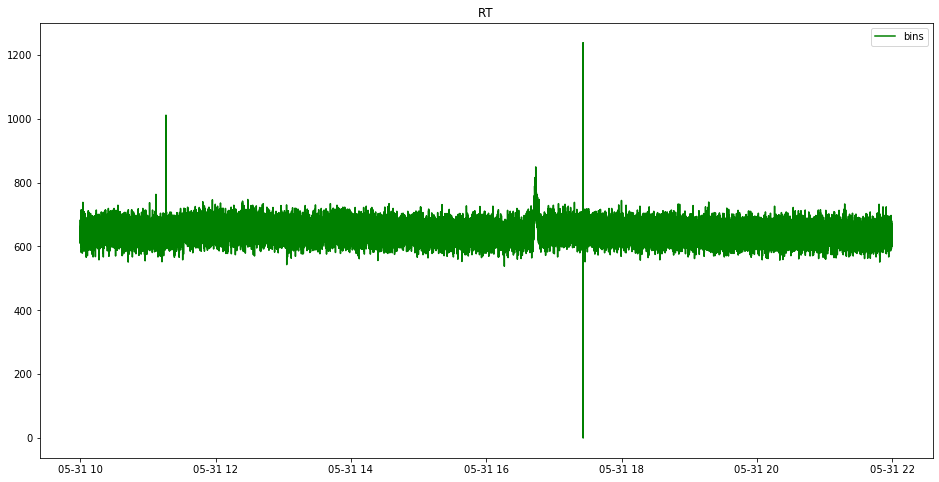

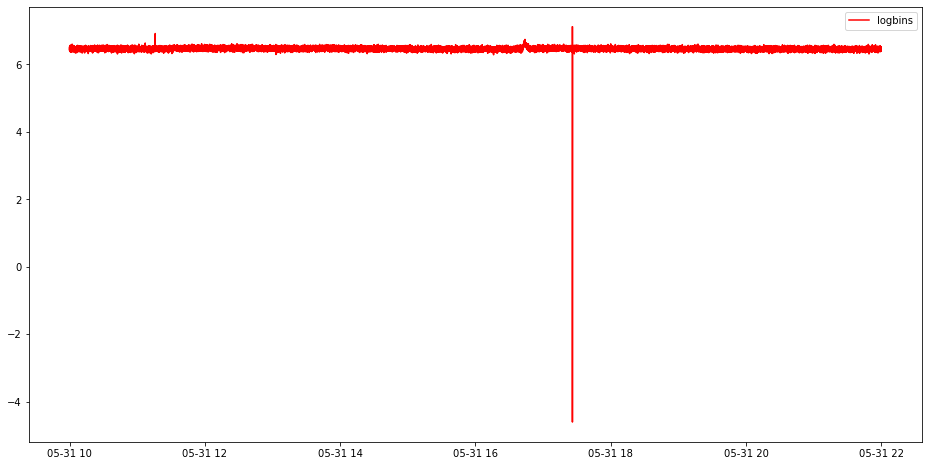

In [10]:
plt.rcParams["figure.figsize"] = [16,8]
plt.plot(df['UTC'],df['bins'],'g-',label="bins")
plt.title('RT')
plt.legend()
plt.show()


plt.plot(df['UTC'],df['logbins'],'r-',label="logbins")     
plt.legend()
plt.show()

In [15]:
np.argmax(df['bins'])

4560

In [12]:
np.argmin(df['bins'])

26761

In [16]:
df['bins'][4560]=700
#df['bins'][26761]=700

/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


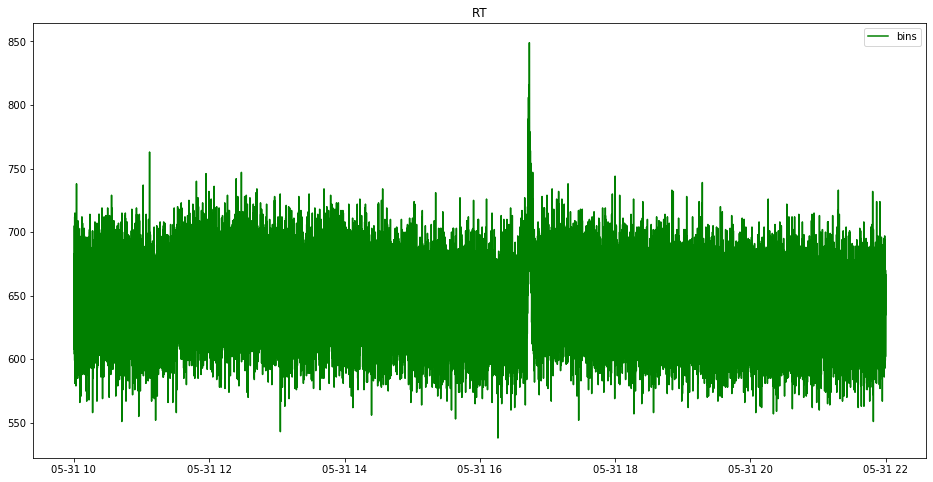

In [17]:
plt.rcParams["figure.figsize"] = [16,8]
plt.plot(df['UTC'],df['bins'],'g-',label="bins")
plt.title('RT')
plt.legend()
plt.show()

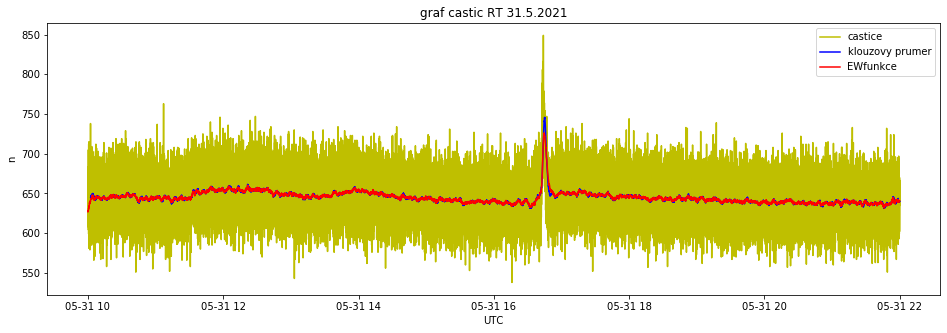

In [21]:
df1=df['bins'].rolling(window=150).mean()
df2=df['bins'].ewm(com=100,adjust=False).mean()


plt.rcParams["figure.figsize"] = [16,5]
plt.plot(df['UTC'], df['bins'],'y-', label="castice")
plt.plot(df['UTC'], df1,'b-', label="klouzovy prumer")
plt.plot(df['UTC'], df2,'r-', label="EWfunkce")
plt.title('graf castic RT 31.5.2021')
plt.xlabel('UTC')
plt.ylabel('n')
plt.legend()
plt.show()


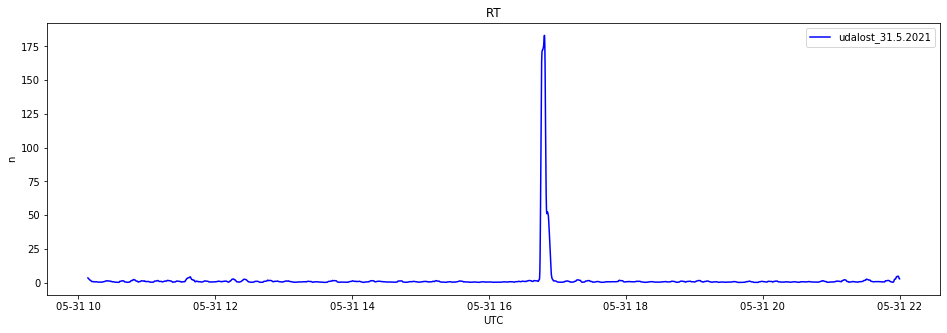

In [22]:
dff=(df2-df1)**2
dff1=dff.rolling(window=250).mean()

plt.rcParams["figure.figsize"] = [16,5]
#plt.plot(df['bins'],'y-', label="bins")
#lt.plot(df['UTC'],df1,'g-', label="castice")
plt.plot(df['UTC'][500:],dff1[500:],'b-', label="udalost_31.5.2021")
#plt.plot(df['UTC'],dff,'r-', label="cloz_prum^2")
plt.title('RT')
plt.xlabel('UTC')
plt.ylabel('n')
plt.legend()
#plt.xlim("2021-05-17 21:00:00","2021-05-17 23:00:00")
#plt.savefig("udalost_4.8.2021.jpg", dpi=150)
plt.show()

No handles with labels found to put in legend.


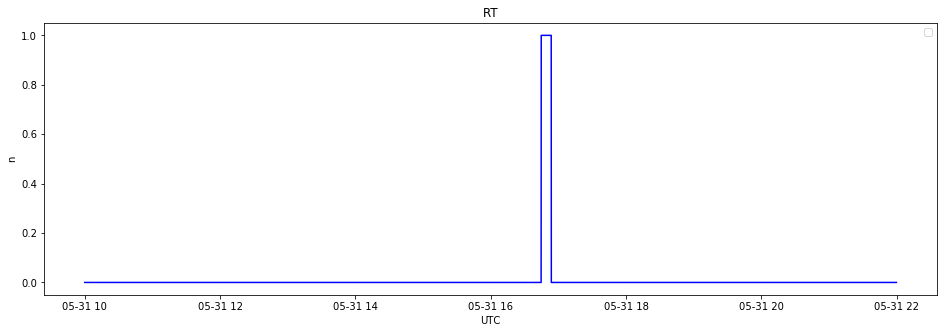

In [23]:
plt.rcParams["figure.figsize"] = [16,5]
#plt.plot(df['bins'],'y-', label="bins")
#lt.plot(df['UTC'],df1,'g-', label="castice")
plt.plot(df['UTC'],1*(dff1>20),'b-')
#plt.plot(df['UTC'],dff,'r-', label="cloz_prum^2")
plt.title('RT')
plt.xlabel('UTC')
plt.ylabel('n')
plt.legend()
#plt.xlim("2021-06-23 23:00:00","2021-06-24 03:00:00")
#plt.savefig("udalost_2.5.2021.jpg", dpi=150)
plt.show()

In [24]:
lamda11=np.mean(df['bins'][100:1100])
lamda22=lamda11+30
A=math.log(lamda22/lamda11)
B=lamda11-lamda22

In [25]:
delta = A*df['bins']+B
s1 = np.cumsum(delta)

In [27]:
s = np.zeros(43194)
s[0] = max([delta[0],0])
for i in range(43192):
    s[i+1] = max([s[i]+delta[i+1],0])
sroll = np.roll(s,20)
ss=np.maximum(s-sroll,0)

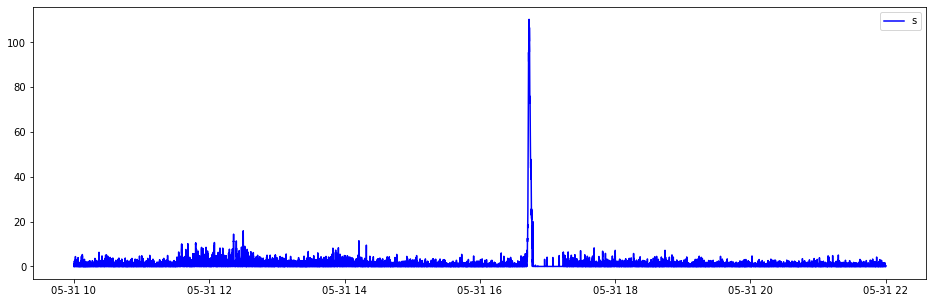

In [28]:
plt.plot(df['UTC'], ss,'b-', label="s")
plt.legend()
plt.show()